# Chainer 手書き文字認識(MNIST) チュートリアル

(chainer 1.21.0 ver.)

In [108]:
# 必要モジュールのインポート

%matplotlib inline

import chainer
import chainer.functions as F
import chainer.links as L
from chainer import training
from chainer.training import extensions
import matplotlib.pyplot as plt
import numpy as np

## MNISTとは？
MNISTは手書き数字の画像のデータセットです。
![](https://www.tensorflow.org/versions/master/images/MNIST.png)
このような画像（28px×28px）の集まりです。

In [109]:
# MNISTのデータセットを読み込む
train, test = chainer.datasets.get_mnist()

In [110]:
# 画像表示用関数

def draw_digit(data):
    """数値の行列データを画像表示"""
    size = 28
    plt.figure(figsize=(2.5, 3))

    X, Y = np.meshgrid(range(size),range(size))
    Z = data.reshape(size,size)   # convert from vector to 28x28 matrix
    Z = Z[::-1,:]             # flip vertical
    plt.xlim(0,27)
    plt.ylim(0,27)
    plt.pcolor(X, Y, Z)
    plt.gray()
    plt.tick_params(labelbottom="off")
    plt.tick_params(labelleft="off")

    plt.show()

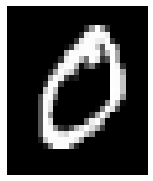

In [118]:
# 画像表示　例
sample_data = np.array(train[1][0])
draw_digit(sample_data)

In [112]:
# 手書き文字画像　行列データ
print(sample_data)

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

このようにコンピュータ上では、画像は行列として扱われています
![](https://www.tensorflow.org/versions/master/images/MNIST-Matrix.png)

参考URL：http://tensorflow.classcat.com/2016/03/09/tensorflow-cc-mnist-for-ml-beginners/

In [123]:
# モデルの定義

class MLP(chainer.Chain):

    def __init__(self):
        """ ネットワークの構造を定義 """
        super(MLP, self).__init__(
            l1=L.Linear(784, 1000),  # 入力784ユニット、出力1000ユニット
            l2=L.Linear(1000, 500),  # 入力1000ユニット、出力500ユニッ
            l3=L.Linear(500, 10),      # 入力500ユニット、出力10ユニット
        )

    def __call__(self, x):
        """ 計算の規則を定義 """
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)

モデルに書いてあるコードを図にすると以下のようになります。

手書き数字のデータは28px×28pxで784次元のベクトルになるので、インプットの数値の個数は784ユニットになります。

アウトプットでは、１〜１０の数字である確率を出力するため10個のユニットになります。
![](https://qiita-image-store.s3.amazonaws.com/0/50670/155b9533-4b47-0748-226c-1e3082930ed9.png)

参考URL：http://qiita.com/kenmatsu4/items/7b8d24d4c5144a686412

## 活性化関数
F.relu()は正規化線形関数(Rectified Linear Unit function)で

$$
{f(x) = \max(0, x)
}
$$
![](https://qiita-image-store.s3.amazonaws.com/0/50670/e1cc4c94-e4ae-0010-82e5-c27956b5986c.png)

このような数式です。

シンプルな関数なので、計算量が小さく学習スピードが速くなることがメリットです。

In [124]:
# ミニバッチのサイズを指定
batchsize = 100

# 学習の繰り返し回数（epoch）を指定
epoch = 20

In [125]:
# 訓練のためのニューラルネットワークをセットアップする
model = L.Classifier(MLP())

# 最適化の方法を定義
optimizer = chainer.optimizers.SGD()
optimizer.setup(model)

In [127]:
# データセットをイテレータの形式に変換する
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize, repeat=False, shuffle=False)

In [128]:
# trainerにセットする
updater = training.StandardUpdater(train_iter, optimizer)
trainer = training.Trainer(updater, (epoch, 'epoch'))

# epochごとに学習後の精度を評価する
trainer.extend(extensions.Evaluator(test_iter, model))

# epochごとにlogを出力する
trainer.extend(extensions.LogReport())

# logに出力する情報を指定する
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss',
                                       'main/accuracy', 'validation/main/accuracy', 'elapsed_time']))

# 進捗バーを表示する
# trainer.extend(extensions.ProgressBar())

# 構成したtrainerをもとに､学習を実行する
trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy  elapsed_time
1           1.1102      0.504376              0.769283       0.879                     10.9824       
2           0.429117    0.352206              0.887533       0.9039                    22.5195       
3           0.342609    0.304576              0.90485        0.9144                    33.5296       
4           0.303725    0.277295              0.914467       0.9216                    44.3066       
5           0.2789      0.258589              0.92105        0.9271                    56.0953       
6           0.259553    0.243513              0.926433       0.931                     71.5407       
7           0.243607    0.229346              0.93175        0.9351                    82.5008       
8           0.229888    0.218205              0.93555        0.9391                    93.7244       
9           0.217481    0.2082                0.939083       0.9407                 

In [129]:
# 訓練済みモデルを保存する(任意)
chainer.serializers.save_npz('mnist_model', model)
chainer.serializers.save_npz('mnist_optimizer', optimizer)

学習済みモデルで数字を予測


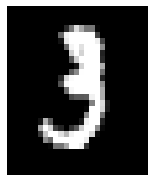

model predict →　「 3 」


In [130]:
# 学習済みモデルを使用した予測
pred = np.array(train[10][0]).reshape(-1, 1, 28, 28)
mnist_test = model.predictor(pred)

pre_num = int(np.argmax(mnist_test.data, axis=1))
print("学習済みモデルで数字を予測")
draw_digit(np.array(train[10][0]))
print("model predict →　「 {} 」".format(pre_num))